In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import alpaca_trade_api as tradeapi
import os
import requests
from dotenv import load_dotenv

from datetime import date
from datetime import timedelta
from nsepy import get_history as gh
from pathlib import Path

In [3]:
# Setting-up the dataframe
df = Path('../Resources/portfolio_eli.csv')
portfolio = pd.read_csv(df, index_col='Stock')
portfolio['Weight'] = portfolio['Weight'].str.replace('%','').astype('float')
portfolio.head()

,Ticker,Weight
Stock,,
Vanguard Mid-Cap Growth ETF,VOT,16.46
Vanguard Growth ETF,VUG,9.08
Apple INC,AAPL,11.83
Activision Blizzard Inc,ATVI,1.91
Vanguard S&P 500 Growth ETF,VOOG,56.70


<Axes: ylabel='Weight'>

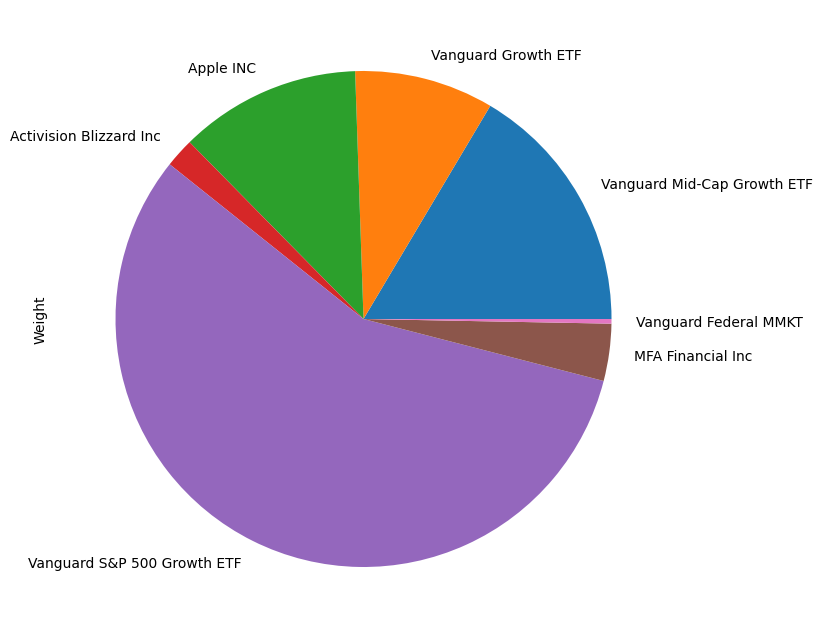

In [5]:
# Visualizing the portfolio weights
portfolio.plot.pie(y='Weight', title='', figsize=(8,10), legend=None)

In [6]:
# Set Alpaca API key and secret
alpaca_api_key = "PKVCMHBCTA6RV3U9QLAF"
alpaca_secret_key = "YUBAXi2swtxAnd3XCD0iPlwOePNe6vFuxckuP2kn"

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [8]:
# Adding the data into lists
stocksymbols = portfolio['Ticker'].tolist()
stockweights = portfolio['Weight'].tolist()

# Setup for end_date, calling on last full day.
today = date.today()

# Getting the initial date ranges for review
startdate = date(2022,1,1)
end_date = today - timedelta(days = 1)
print(end_date)
print(f'There are {len(stocksymbols)} individual stocks in your portfolio')

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

2023-02-13
There are 7 individual stocks in your portfolio


In [9]:
# Get current closing prices for stocksymbols
df_portfolio = alpaca.get_bars(
    stocksymbols,
    timeframe,
    start = startdate,
    end = end_date
).df

df_portfolio

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-01-03 05:00:00+00:00,177.83,182.8800,177.7100,182.010,104689466,772366,181.415520,AAPL
2022-01-04 05:00:00+00:00,182.64,182.9400,179.1200,179.700,99433260,831617,180.553940,AAPL
2022-01-05 05:00:00+00:00,179.61,180.1700,174.6500,174.835,86753605,844517,177.497780,AAPL
2022-01-06 05:00:00+00:00,172.70,175.3000,171.6400,172.000,96792589,958688,173.079885,AAPL
2022-01-07 05:00:00+00:00,172.89,174.1400,171.0300,172.170,87682412,716118,172.439116,AAPL
...,...,...,...,...,...,...,...,...
2023-02-07 05:00:00+00:00,240.76,246.3700,239.9000,245.580,1075183,16171,242.711016,VUG
2023-02-08 05:00:00+00:00,244.34,245.5700,241.3974,241.980,838578,13951,242.661091,VUG
2023-02-09 05:00:00+00:00,245.00,245.1699,238.7200,239.680,888840,12505,241.734380,VUG
